In [1]:
import pandas as pd
import json
import numpy as np

### Importar dataset

Antes de Tudo converta os arquivos .json para arquivos .csv utilizando a arquivo json_to_csv_converter.py com o seguinte comando (a documentação - https://www.yelp.com/dataset/documentation/main - indica um código fonte para essa tarefa -https://github.com/Yelp/dataset-examples - mas foi preciso adaptações no código):

`python3 json_to_csv_converter.py <name_file.json>`

Depois import o arquivo csv gerado

In [2]:
file = '../yelp_dataset/yelp_academic_dataset_business.csv'
df = pd.read_csv(file, encoding = 'utf-8')

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,7,9,19,31,79,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,attributes.GoodForMeal.latenight,hours.Sunday,attributes.RestaurantsTakeOut,attributes.BestNights.tuesday,attributes.BYOB,attributes.HairSpecializesIn.perms,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.BusinessAcceptsCreditCards,attributes.DietaryRestrictions.dairy-free,...,attributes.RestaurantsTableService,attributes.OutdoorSeating,attributes.Corkage,attributes.Ambience.trendy,attributes.HairSpecializesIn.straightperms,attributes.GoodForDancing,attributes.AgesAllowed,attributes.Music.dj,attributes.Open24Hours,attributes.DietaryRestrictions.gluten-free
0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,17:0-23:0,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,10:0-22:0,False,NaN,NaN,NaN,NaN,NaN,False,NaN,...,True,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['attributes.GoodForMeal.latenight', 'hours.Sunday',
       'attributes.RestaurantsTakeOut', 'attributes.BestNights.tuesday',
       'attributes.BYOB', 'attributes.HairSpecializesIn.perms',
       'attributes.DietaryRestrictions.halal',
       'attributes.DietaryRestrictions.soy-free',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.DietaryRestrictions.dairy-free',
       ...
       'attributes.RestaurantsTableService', 'attributes.OutdoorSeating',
       'attributes.Corkage', 'attributes.Ambience.trendy',
       'attributes.HairSpecializesIn.straightperms',
       'attributes.GoodForDancing', 'attributes.AgesAllowed',
       'attributes.Music.dj', 'attributes.Open24Hours',
       'attributes.DietaryRestrictions.gluten-free'],
      dtype='object', length=103)

In [5]:
df.shape

(188593, 103)

In [6]:
df.drop('attributes',axis=1,inplace=True)
df.drop('hours', axis=1,inplace=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

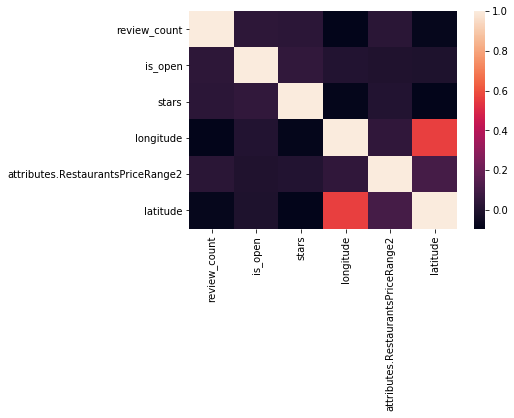

In [8]:
sns.heatmap(df.corr())

### Obtendo apenas restaurantes e convertendo column categories em várias colunas

Passos:
- Tranformar string em lista separada por ','
- Obter apenas os estabelecimentos que tem como categoria 'Restaurants'
- Gerar dummies com os itens da lista
- Adicionar prefixo categories
- Juntar dataframes

In [9]:
df.categories = df.categories.str.split(',', expand=False) 


In [10]:
df1 = df[df.categories.apply(lambda x: 'Restaurants' in x if isinstance(x, list) else False)]

In [11]:
df1.shape

(18256, 101)

In [12]:
dk = df1['categories'].str.join('|').str.get_dummies()


In [13]:
dk = dk.add_prefix('categories_')

In [14]:
dk.shape

(18256, 419)

In [15]:
dff = df1.join(dk)

### Juntando dataset business com o dataset checkin
- Importar dataset checkin
- Calcular total de checkins
- Juntar dataset business com o dataset checkin com base no business_id

In [16]:
filet = '../yelp_dataset/yelp_academic_dataset_checkin.csv'
dft = pd.read_csv(filet, encoding = 'utf-8')

In [17]:
dft['Total_checkin']= dft.iloc[:, :].sum(axis=1)

In [18]:
k = dff[dff['business_id'].isin(dft['business_id'])]

In [19]:
k = k.merge(dft, left_on='business_id', right_on='business_id', how='outer')

In [24]:
k.head()

,attributes.GoodForMeal.latenight,hours.Sunday,attributes.RestaurantsTakeOut,attributes.BestNights.tuesday,attributes.BYOB,attributes.HairSpecializesIn.perms,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.BusinessAcceptsCreditCards,attributes.DietaryRestrictions.dairy-free,...,time.Thu-17,time.Mon-13,time.Thu-8,time.Sat-9,time.Sat-12,time.Mon-22,time.Mon-12,time.Sun-20,time.Sun-13,Total_checkin
0,NaN,12:0-23:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,False,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
2,False,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20.0
3,False,7:0-14:0,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,False,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0


In [25]:
k.shape

(157075, 689)

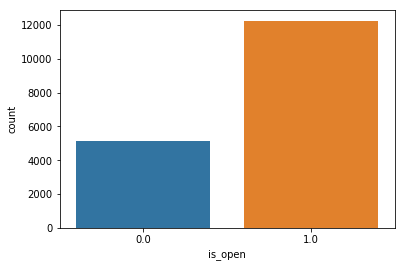

In [20]:
sns.countplot(x=k['is_open'], data=k)


/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


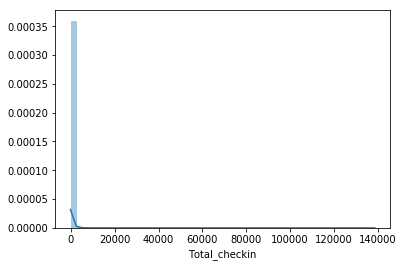

In [21]:
sns.distplot(k['Total_checkin'])

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


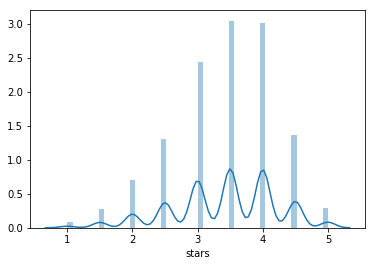

In [22]:
sns.distplot(k['stars'].dropna())

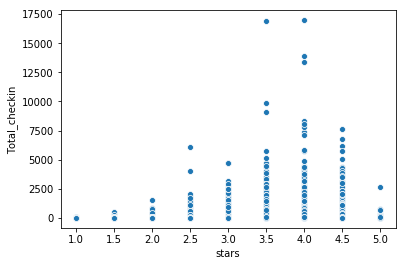

In [23]:
sns.scatterplot(x="stars", y="Total_checkin", data=k)